<a href="https://colab.research.google.com/github/Tarek-Mohamed85/Factory-Defect-Detection-Quality-Classification-/blob/main/Full_version_DeepPCB2T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection

## Downloading DeepPCB_Repo

In [1]:
!pip install GitPython


In [2]:
import git

repo_url = "https://github.com/tangsanli5201/DeepPCB.git"
git.Repo.clone_from(repo_url, "DeepPCB_v2")



<git.repo.base.Repo '/content/DeepPCB_v2/.git'>

In [3]:
import os

# Path to the root of the cloned repo
repo_path = "/content/DeepPCB_v2"

# Example: path to the PCBData folder
pcb_data_path = os.path.join(repo_path, "PCBData")

# List contents inside PCBData
print("Files in PCBData:")
print(os.listdir(pcb_data_path))


Files in PCBData:
['group12100', 'group44000', 'trainval.txt', 'group92000', 'test.txt', 'group12300', 'group50600', 'group90100', 'group20085', 'group12000', 'group13000', 'group00041', 'group77000']


## Loading the Repo Structure

In [4]:
import os

def print_repo_structure(root_path):
    for dirpath, dirnames, filenames in os.walk(root_path):
        level = dirpath.replace(root_path, '').count(os.sep)
        indent = '  ' * level
        print(f"{indent}📁 {os.path.basename(dirpath)}")
        for f in filenames:
            print(f"{indent}  📄 {f}")

# Path to your cloned repo
repo_path = "/content/DeepPCB_v2"
print_repo_structure(repo_path)


📁 DeepPCB_v2
  📄 LICENSE
  📄 .gitignore
  📄 README.md
  📁 PCBData
    📄 trainval.txt
    📄 test.txt
    📁 group12100
      📁 12100_not
        📄 12100190.txt
        📄 12100136.txt
        📄 12100001.txt
        📄 12100173.txt
        📄 12100053.txt
        📄 12100008.txt
        📄 12100148.txt
        📄 12100188.txt
        📄 12100050.txt
        📄 12100021.txt
        📄 12100191.txt
        📄 12100198.txt
        📄 12100005.txt
        📄 12100166.txt
        📄 12100156.txt
        📄 12100056.txt
        📄 12100035.txt
        📄 12100182.txt
        📄 12100163.txt
        📄 12100003.txt
        📄 12100037.txt
        📄 12100140.txt
        📄 12100131.txt
        📄 12100132.txt
        📄 12100045.txt
        📄 12100016.txt
        📄 12100046.txt
        📄 12100025.txt
        📄 12100145.txt
        📄 12100036.txt
        📄 12100018.txt
        📄 12100168.txt
        📄 12100197.txt
        📄 12100039.txt
        📄 12100161.txt
        📄 12100175.txt
        📄 12100060.txt
        📄 1210

## Loading the PCBData Structure

In [5]:
import os


# Step 1: Get all primary folders
primary_folders = [f for f in os.listdir(pcb_data_path) if f.startswith("group")]

print("Total Groups Found:", len(primary_folders))
print("All Groups:", primary_folders[:])


Total Groups Found: 11
All Groups: ['group12100', 'group44000', 'group92000', 'group12300', 'group50600', 'group90100', 'group20085', 'group12000', 'group13000', 'group00041', 'group77000']


In [6]:
import os
import shutil


# Target folders to gather all data into
images_output_dir = os.path.join(pcb_data_path, "AllImages")
annotations_output_dir = os.path.join(pcb_data_path, "AllAnnotations")

os.makedirs(images_output_dir, exist_ok=True)
os.makedirs(annotations_output_dir, exist_ok=True)

# Go through each groupXXXX folder
for group in os.listdir(pcb_data_path):
    group_path = os.path.join(pcb_data_path, group)

    if os.path.isdir(group_path) and group.startswith("group"):
        subfolders = os.listdir(group_path)

        # Identify image and annotation folders by name pattern
        for sub in subfolders:
            sub_path = os.path.join(group_path, sub)

            if os.path.isdir(sub_path):
                if sub.endswith("_not"):
                    # Annotation folder
                    for file in os.listdir(sub_path):
                        src = os.path.join(sub_path, file)
                        dst = os.path.join(annotations_output_dir, f"{file}")
                        shutil.copy2(src, dst)
                else:
                    # Image folder
                    for file in os.listdir(sub_path):
                        src = os.path.join(sub_path, file)
                        dst = os.path.join(images_output_dir, f"{file}")
                        shutil.copy2(src, dst)

print("✅ All images and annotations collected successfully!")


✅ All images and annotations collected successfully!


## Collecting All Template Images in a folder and All Tested

In [7]:
import os
import shutil

# Path to the folder containing all images
all_images_path = "DeepPCB_v2/PCBData/AllImages"  # 🔁 replace with actual path

# Output folders
templates_dir = os.path.join(all_images_path, "..", "AllTemplates")
test_dir = os.path.join(all_images_path, "..", "AllTest")

os.makedirs(templates_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop over files in Allimages
for file in os.listdir(all_images_path):
    src_file = os.path.join(all_images_path, file)

    if file.endswith("_temp.jpg") or file.endswith("_temp.png"):
        dst_file = os.path.join(templates_dir, file)
        shutil.copy2(src_file, dst_file)

    elif file.endswith("_test.jpg") or file.endswith("_test.png"):
        dst_file = os.path.join(test_dir, file)
        shutil.copy2(src_file, dst_file)

print("✅ All _temp and _test images copied successfully.")


✅ All _temp and _test images copied successfully.


## Check Number of Files

In [8]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/AllImages'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 3001


In [9]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/AllAnnotations'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 1500


In [10]:

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/AllTemplates'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 1501


In [11]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/AllTest'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 1500


## Check Annotation Format

In [12]:
# ✅ Read and print contents of a TXT file

file_path = "DeepPCB_v2/PCBData/AllAnnotations/00041000.txt"  # 🔁 Replace this with your actual path
 # 🔁 Replace with your actual file path

def detect_type(value):
    try:
        int(value)
        return "int"
    except ValueError:
        try:
            float(value)
            return "float"
        except ValueError:
            return "str"

try:
    with open(file_path, "r") as file:
        print("🔍 Data types in file:")
        for i, line in enumerate(file):
            line = line.strip()
            if not line:
                continue  # Skip empty lines
            values = line.split()  # Or use .split(',') if comma-separated
            types = [detect_type(v) for v in values]
            print(f"Line {i+1}: {values} → {types}")
except FileNotFoundError:
    print(f"❌ File not found: {file_path}")
except Exception as e:
    print(f"⚠️ Error reading file: {e}")



🔍 Data types in file:
Line 1: ['466', '441', '493', '470', '3'] → ['int', 'int', 'int', 'int', 'int']
Line 2: ['454', '300', '493', '396', '2'] → ['int', 'int', 'int', 'int', 'int']
Line 3: ['331', '248', '364', '283', '4'] → ['int', 'int', 'int', 'int', 'int']
Line 4: ['221', '314', '253', '350', '4'] → ['int', 'int', 'int', 'int', 'int']
Line 5: ['151', '149', '182', '175', '5'] → ['int', 'int', 'int', 'int', 'int']
Line 6: ['492', '28', '525', '55', '6'] → ['int', 'int', 'int', 'int', 'int']
Line 7: ['424', '24', '461', '53', '6'] → ['int', 'int', 'int', 'int', 'int']
Line 8: ['250', '341', '278', '370', '6'] → ['int', 'int', 'int', 'int', 'int']
Line 9: ['539', '259', '592', '316', '1'] → ['int', 'int', 'int', 'int', 'int']
Line 10: ['89', '469', '127', '497', '5'] → ['int', 'int', 'int', 'int', 'int']


## Creating a csv of images and annotations

In [13]:
import os
import csv

# ✅ Define correction method
def correct_annotations(annotations_data):
    """
    Corrects all annotations by ensuring each annotation is a list of integers.
    """
    corrected_annotations = {}

    for group, images in annotations_data.items():
        corrected_annotations[group] = {}

        for image, annotations in images.items():
            corrected_list = []

            for ann in annotations:
                values = ann[0].split() if len(ann) == 1 else ann
                try:
                    corrected_list.append([int(v) for v in values])
                except ValueError:
                    print(f"⚠️ Skipping invalid annotation: {ann}")

            corrected_annotations[group][image] = corrected_list

    return corrected_annotations


# ✅ Paths
images_folder = "DeepPCB_v2/PCBData/AllTest"
annotations_folder = "DeepPCB_v2/PCBData/AllAnnotations"
output_csv = "DeepPCB_v2/PCBData/annotations_final.csv"

# Step 1: Load and parse annotations
annotations_data_raw = {"global": {}}
image_to_ann_key = {}  # Maps image name to corresponding annotation key

image_files = [f for f in os.listdir(images_folder) if f.endswith((".jpg", ".png"))]

for image_name in image_files:
    # Extract the number from image name (e.g. 00041000 from 00041000_test.jpg)
    base_id = image_name.split("_")[0]
    annotation_file = f"{base_id}.txt"
    annotation_path = os.path.join(annotations_folder, annotation_file)

    annotations = []
    if os.path.exists(annotation_path):
        with open(annotation_path, "r") as f:
            lines = f.read().strip().splitlines()
            for line in lines:
                if line.strip():
                    annotations.append(line.strip().split())

    annotations_data_raw["global"][image_name] = annotations
    image_to_ann_key[image_name] = base_id

# Step 2: Correct the annotations
annotations_data = correct_annotations(annotations_data_raw)

# Step 3: Save to CSV
with open(output_csv, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["image", "annotation_str"])

    for image_name in image_files:
        ann_list = annotations_data["global"].get(image_name, [])
        ann_str = "|".join([",".join(map(str, ann)) for ann in ann_list])
        writer.writerow([image_name, ann_str])

print(f"✅ Cleaned annotations saved to: {output_csv}")


✅ Cleaned annotations saved to: DeepPCB_v2/PCBData/annotations_final.csv


In [14]:
import pandas as pd
df = pd.read_csv("DeepPCB_v2/PCBData/annotations_final.csv")
df.head()


,image,annotation_str
0,44000077_test.jpg,"223,258,269,283,1|395,0,440,46,1|107,71,165,12..."
1,20085132_test.jpg,"327,188,359,218,1|230,384,256,434,2|470,396,50..."
2,00041015_test.jpg,"544,124,573,156,1|263,151,300,178,3|395,224,43..."
3,20085121_test.jpg,"156,131,192,164,1|211,280,264,304,2|174,253,20..."
4,12300229_test.jpg,"281,373,317,401,1|452,254,491,283,2|436,171,47..."


## Applying All Annotations on their Corresponding Images

In [15]:
!pip install opencv-python-headless


In [16]:
!python -c "import sys; print(sys.executable); import cv2; print(cv2.__version__)"


/usr/bin/python3
4.11.0


In [17]:
import cv2
import os
import glob

# Define input directories
images_folder = r"DeepPCB_v2/PCBData/AllTest"        # Folder containing the input images
annotations_folder = r"DeepPCB_v2/PCBData/AllAnnotations"  # Folder containing the annotation files

# Define the output folder for annotated images
output_folder = r"DeepPCB_v2/PCBData/Annotated_Images"
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

def draw_annotations_on_image(image, annotations):
    """
    Draw bounding boxes and defect labels onto an image.

    Parameters:
        image (numpy.ndarray): The loaded image.
        annotations (list): List of annotation lines, each line contains 'x1,y1,x2,y2,defect_type'.

    Returns:
        Annotated image.
    """
    # Define defect names and colors
    defect_info = {
        1: ("Open", (0, 0, 255)),       # Red
        2: ("Short", (139, 69, 19)),      # Brown
        3: ("Mousebite", (255, 0, 0)),    # Blue
        4: ("Spur", (184, 134, 11)),      # Orange
        5: ("Copper", (0, 191, 255)),     # Cyan
        6: ("Pin-hole", (128, 0, 128))    # Purple
    }

    for ann in annotations:
        # Clean and split the line (it may be comma or whitespace separated)
        parts = ann.strip().replace(" ", " ").split()
        if len(parts) < 5:
            print(f"⚠️ Invalid annotation format: {ann}")
            continue

        try:
            x1, y1, x2, y2, defect_type = map(int, parts[:5])
        except ValueError:
            print(f"⚠️ Could not parse numbers from annotation: {ann}")
            continue

        defect_label, color = defect_info.get(defect_type, ("Unknown", (0, 0, 0)))
        # Draw the bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        # Add the label above the rectangle
        cv2.putText(image, defect_label, (x1, max(y1 - 10, 0)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    return image

# Find all image paths (assuming images are in JPG format)
image_paths = glob.glob(os.path.join(images_folder, "*.jpg"))

images_without_annotations = []

for img_path in image_paths:
    img_name = os.path.basename(img_path)
    base_id = img_name.split("_")[0]
    annotation_file = f"{base_id}.txt"

    # Assume the corresponding annotation file has the same base name with .txt extension
    annotation_path = os.path.join(annotations_folder, annotation_file)

    if not os.path.exists(annotation_path):
        print(f"⚠️ No annotation file found for image: {img_name}")
        images_without_annotations.append(img_name)
        continue

    # Read annotations from the file
    with open(annotation_path, "r") as f:
        annotation_lines = f.readlines()

    if not annotation_lines:
        print(f"⚠️ Annotation file is empty for image: {img_name}")
        images_without_annotations.append(img_name)
        continue

    # Read the image using OpenCV
    image = cv2.imread(img_path)
    if image is None:
        print(f"⚠️ Error loading image: {img_name}")
        continue

    # Draw annotations on the image
    annotated_image = draw_annotations_on_image(image, annotation_lines)

    # Define the output path and save the annotated image
    output_path = os.path.join(output_folder, img_name)
    cv2.imwrite(output_path, annotated_image)
    print(f"✅ Annotated image saved as: {output_path}")

if images_without_annotations:
    print(f"❌ {len(images_without_annotations)} images have NO annotations!")
else:
    print("✅ All images have annotations.")


✅ Annotated image saved as: DeepPCB_v2/PCBData/Annotated_Images/44000077_test.jpg
✅ Annotated image saved as: DeepPCB_v2/PCBData/Annotated_Images/20085132_test.jpg
✅ Annotated image saved as: DeepPCB_v2/PCBData/Annotated_Images/00041015_test.jpg
✅ Annotated image saved as: DeepPCB_v2/PCBData/Annotated_Images/20085121_test.jpg
✅ Annotated image saved as: DeepPCB_v2/PCBData/Annotated_Images/12300229_test.jpg
✅ Annotated image saved as: DeepPCB_v2/PCBData/Annotated_Images/00041061_test.jpg
✅ Annotated image saved as: DeepPCB_v2/PCBData/Annotated_Images/20085009_test.jpg
✅ Annotated image saved as: DeepPCB_v2/PCBData/Annotated_Images/20085201_test.jpg
✅ Annotated image saved as: DeepPCB_v2/PCBData/Annotated_Images/50600065_test.jpg
✅ Annotated image saved as: DeepPCB_v2/PCBData/Annotated_Images/12300153_test.jpg
✅ Annotated image saved as: DeepPCB_v2/PCBData/Annotated_Images/90100035_test.jpg
✅ Annotated image saved as: DeepPCB_v2/PCBData/Annotated_Images/00041162_test.jpg
✅ Annotated imag

## Correcting The Number of Files in The created Folders

In [18]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/AllAnnotations'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 1500


In [19]:
import os
from collections import defaultdict

def find_duplicate_filenames(folder_path):
    file_map = defaultdict(list)

    # Walk through all files in the directory
    for root, _, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            file_map[file].append(file_path)

    # Print duplicates
    duplicates_found = False
    for name, paths in file_map.items():
        if len(paths) > 1:
            duplicates_found = True
            print(f"\n📁 Duplicate file name: {name}")
            for p in paths:
                print(f"  ↳ {p}")

    if not duplicates_found:
        print("✅ No duplicate file names found.")

# 👉 Example usage
folder_to_check = "DeepPCB_v2/PCBData/AllAnnotations"
find_duplicate_filenames(folder_to_check)


✅ No duplicate file names found.


In [20]:
import os
import hashlib
from collections import defaultdict

def compute_file_hash(filepath, block_size=65536):
    """Generate a SHA-256 hash for a given file."""
    sha256 = hashlib.sha256()
    try:
        with open(filepath, 'rb') as f:
            while chunk := f.read(block_size):
                sha256.update(chunk)
        return sha256.hexdigest()
    except Exception as e:
        print(f"⚠️ Error hashing file {filepath}: {e}")
        return None

def delete_all_duplicates(root_folder):
    """Find and delete all files that have duplicate content."""
    hashes = defaultdict(list)
    total_files = 0
    deleted_files = 0

    # Walk through all files
    for dirpath, _, filenames in os.walk(root_folder):
        for filename in filenames:
            total_files += 1
            file_path = os.path.join(dirpath, filename)
            file_hash = compute_file_hash(file_path)

            if file_hash:
                hashes[file_hash].append(file_path)

    # Delete all files that appear more than once
    for file_list in hashes.values():
        if len(file_list) > 1:
            for file_path in file_list:
                try:
                    os.remove(file_path)
                    deleted_files += 1
                    print(f"🗑️ Deleted duplicate: {file_path}")
                except Exception as e:
                    print(f"❌ Failed to delete {file_path}: {e}")

    print(f"\n✅ Done. Scanned {total_files} files.")
    print(f"🗑️ Deleted {deleted_files} duplicate files.")



# 👇 Replace with your folder path in Azure ML Studio
target_folder = "DeepPCB_v2/PCBData/AllAnnotations"
delete_all_duplicates(target_folder)





✅ Done. Scanned 1500 files.
🗑️ Deleted 0 duplicate files.


In [21]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/AllAnnotations'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 1500


In [22]:
import pandas as pd
dataf = pd.read_csv("DeepPCB_v2/PCBData/annotations_final.csv")
dataf.columns

Index(['image', 'annotation_str'], dtype='object')

In [23]:
dataf["annotation_str"].unique()
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image           1500 non-null   object
 1   annotation_str  1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB


In [24]:
import os

def delete_non_txt_files(folder_path):
    deleted_files = []

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        if os.path.isfile(file_path) and not file_name.lower().endswith('.txt'):
            os.remove(file_path)
            deleted_files.append(file_name)

    if deleted_files:
        print("🗑️ Deleted files with non-.txt extensions:")
        for file in deleted_files:
            print(f" - {file}")
    else:
        print("✅ No non-.txt files found. Nothing deleted.")

# 🔁 Replace this with your folder path
folder_path = "DeepPCB_v2/PCBData/AllAnnotations"
delete_non_txt_files(folder_path)


✅ No non-.txt files found. Nothing deleted.


In [25]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/AllAnnotations'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 1500


## Check redundant files

In [26]:
import os
import hashlib
from collections import defaultdict

def compute_file_hash(filepath, block_size=65536):
    """Generate a SHA-256 hash for a given file."""
    sha256 = hashlib.sha256()
    try:
        with open(filepath, 'rb') as f:
            while chunk := f.read(block_size):
                sha256.update(chunk)
        return sha256.hexdigest()
    except Exception as e:
        print(f"⚠️ Error hashing file {filepath}: {e}")
        return None

def delete_all_duplicates(root_folder):
    """Find and delete all files that have duplicate content."""
    hashes = defaultdict(list)
    total_files = 0
    deleted_files = 0

    # Walk through all files
    for dirpath, _, filenames in os.walk(root_folder):
        for filename in filenames:
            total_files += 1
            file_path = os.path.join(dirpath, filename)
            file_hash = compute_file_hash(file_path)

            if file_hash:
                hashes[file_hash].append(file_path)

    # Delete all files that appear more than once
    for file_list in hashes.values():
        if len(file_list) > 1:
            for file_path in file_list:
                try:
                    os.remove(file_path)
                    deleted_files += 1
                    print(f"🗑️ Deleted duplicate: {file_path}")
                except Exception as e:
                    print(f"❌ Failed to delete {file_path}: {e}")

    print(f"\n✅ Done. Scanned {total_files} files.")
    print(f"🗑️ Deleted {deleted_files} duplicate files.")



# 👇 Replace with your folder path in Azure ML Studio
target_folder = "DeepPCB_v2/PCBData/AllTemplates"
delete_all_duplicates(target_folder)




🗑️ Deleted duplicate: DeepPCB_v2/PCBData/AllTemplates/20085168_temp.jpg
🗑️ Deleted duplicate: DeepPCB_v2/PCBData/AllTemplates/20085167_temp.jpg
🗑️ Deleted duplicate: DeepPCB_v2/PCBData/AllTemplates/20085159_temp.jpg

✅ Done. Scanned 1501 files.
🗑️ Deleted 3 duplicate files.


In [27]:
import shutil
import os

# Set the source image path and destination folder
source_image = "DeepPCB_v2/PCBData/AllImages/20085159_temp.jpg"
destination_folder = "DeepPCB_v2/PCBData/AllTemplates"

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Construct full destination path
destination_path = os.path.join(destination_folder, os.path.basename(source_image))

# Copy the image
shutil.copy2(source_image, destination_path)

print(f"✅ Image copied to: {destination_path}")


✅ Image copied to: DeepPCB_v2/PCBData/AllTemplates/20085159_temp.jpg


In [28]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/AllTemplates'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 1499


In [29]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/AllTest'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 1500


In [30]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/AllImages'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 3001


In [31]:
import os
import hashlib
from collections import defaultdict

def compute_file_hash(filepath, block_size=65536):
    """Generate a SHA-256 hash for a given file."""
    sha256 = hashlib.sha256()
    try:
        with open(filepath, 'rb') as f:
            while chunk := f.read(block_size):
                sha256.update(chunk)
        return sha256.hexdigest()
    except Exception as e:
        print(f"⚠️ Error hashing file {filepath}: {e}")
        return None

def delete_all_duplicates(root_folder):
    """Find and delete all files that have duplicate content."""
    hashes = defaultdict(list)
    total_files = 0
    deleted_files = 0

    # Walk through all files
    for dirpath, _, filenames in os.walk(root_folder):
        for filename in filenames:
            total_files += 1
            file_path = os.path.join(dirpath, filename)
            file_hash = compute_file_hash(file_path)

            if file_hash:
                hashes[file_hash].append(file_path)

    # Delete all files that appear more than once
    for file_list in hashes.values():
        if len(file_list) > 1:
            for file_path in file_list:
                try:
                    #os.remove(file_path)
                    #deleted_files += 1
                    print(f"🗑️ Deleted duplicate: {file_path}")
                except Exception as e:
                    print(f"❌ Failed to delete {file_path}: {e}")

    print(f"\n✅ Done. Scanned {total_files} files.")
    print(f"🗑️ Deleted {deleted_files} duplicate files.")



# 👇 Replace with your folder path in Azure ML Studio
target_folder = "DeepPCB_v2/PCBData/AllTest"
delete_all_duplicates(target_folder)





✅ Done. Scanned 1500 files.
🗑️ Deleted 0 duplicate files.


In [32]:
import os

# Folder containing the images
folder_path = "DeepPCB_v2/PCBData/AllImages"

# Image file names to remove
images_to_delete = ["20085167_temp.jpg", "20085168_temp.jpg"]

# Loop through the files and delete if they exist
for image_name in images_to_delete:
    image_path = os.path.join(folder_path, image_name)
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"🗑️ Deleted: {image_name}")
    else:
        print(f"⚠️ File not found: {image_name}")



🗑️ Deleted: 20085167_temp.jpg
🗑️ Deleted: 20085168_temp.jpg


In [33]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/AllImages'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 2999


In [34]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/Annotated_Images'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 1500


In [35]:
import os
import hashlib
from collections import defaultdict

def compute_file_hash(filepath, block_size=65536):
    """Generate a SHA-256 hash for a given file."""
    sha256 = hashlib.sha256()
    try:
        with open(filepath, 'rb') as f:
            while chunk := f.read(block_size):
                sha256.update(chunk)
        return sha256.hexdigest()
    except Exception as e:
        print(f"⚠️ Error hashing file {filepath}: {e}")
        return None

def delete_all_duplicates(root_folder):
    """Find and delete all files that have duplicate content."""
    hashes = defaultdict(list)
    total_files = 0
    deleted_files = 0

    # Walk through all files
    for dirpath, _, filenames in os.walk(root_folder):
        for filename in filenames:
            total_files += 1
            file_path = os.path.join(dirpath, filename)
            file_hash = compute_file_hash(file_path)

            if file_hash:
                hashes[file_hash].append(file_path)

    # Delete all files that appear more than once
    for file_list in hashes.values():
        if len(file_list) > 1:
            for file_path in file_list:
                try:
                    os.remove(file_path)
                    deleted_files += 1
                    print(f"🗑️ Deleted duplicate: {file_path}")
                except Exception as e:
                    print(f"❌ Failed to delete {file_path}: {e}")

    print(f"\n✅ Done. Scanned {total_files} files.")
    print(f"🗑️ Deleted {deleted_files} duplicate files.")



# 👇 Replace with your folder path in Azure ML Studio
target_folder = "DeepPCB_v2/PCBData/Annotated_Images"
delete_all_duplicates(target_folder)





✅ Done. Scanned 1500 files.
🗑️ Deleted 0 duplicate files.


In [36]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/Annotated_Images'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 1500


## Getting the Images Labelled for Classification Task

In [37]:
import os
import csv
import glob

# ──────────────────────────────────────────────────────────
# MODIFY: Adjust these paths according to your folder setup
# ──────────────────────────────────────────────────────────

dataset_path = r"DeepPCB_v2/PCBData"

# Folders for images and annotations
images_folder = os.path.join(dataset_path, "AllImages")
annotations_folder = os.path.join(dataset_path, "AllAnnotations")

# Output CSV file for classification labels
output_csv = os.path.join(dataset_path, "classification_labels.csv")

# ──────────────────────────────────────────────────────────
# CREATE A LIST TO STORE IMAGE PATHS AND LABELS
# Label: 0 = no defect, 1 = defect
# ──────────────────────────────────────────────────────────

data_rows = []

# GET ALL IMAGES (BOTH TESTED & TEMPLATE) FROM "Images" FOLDER
image_paths = glob.glob(os.path.join(images_folder, "*.jpg"), recursive=True)

for img_path in image_paths:
    img_name = os.path.basename(img_path)
    img_name_no_ext = os.path.splitext(img_name)[0]  # e.g. "00041000_test" or "00041000_temp"

    # Default label is 0 (no defect)
    label = 0

    # CHECK IF IT'S A TESTED IMAGE
    if "_test" in img_name_no_ext:
        # The annotation file has the same base name without "_test", e.g. "00041000.txt"
        annotation_base = img_name_no_ext.replace("_test", "")  # e.g. "00041000"
        annotation_file = os.path.join(annotations_folder, annotation_base + ".txt")

        # IF AN ANNOTATION FILE EXISTS, LABEL AS DEFECT (1)
        if os.path.exists(annotation_file):
            label = 1
        # ELSE, label stays 0 (no defect) if annotation file is missing

    # If "_temp" in the name, we do nothing special; it remains label=0
    # If you have other naming patterns, handle them here.

    # APPEND A ROW: [IMAGE_PATH, LABEL]
    data_rows.append([img_path, label])

# ──────────────────────────────────────────────────────────
# SAVE THE CSV FILE
# ──────────────────────────────────────────────────────────
with open(output_csv, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["image_path", "label"])  # header
    writer.writerows(data_rows)

print(f"✅ Classification labels saved to: {output_csv}")


✅ Classification labels saved to: DeepPCB_v2/PCBData/classification_labels.csv


## Checking The Number of Labelled Tested_Images

In [38]:
import csv

# Path to the CSV file
csv_file_path = r"DeepPCB_v2/PCBData/classification_labels.csv"

def count_ones_in_csv(csv_path):
    """Counts how many rows have label=1 in the specified CSV file."""
    count_ones = 0

    with open(csv_path, mode="r", newline="", encoding="utf-8") as file:
        reader = csv.DictReader(file)
        for row in reader:
            # Convert the label to int and check if it's 1
            if int(row["label"]) == 1:
                count_ones += 1

    return count_ones

num_ones = count_ones_in_csv(csv_file_path)
print(f"Number of rows with label=1: {num_ones}")


Number of rows with label=1: 1500


In [39]:
import csv

# Specify the path to your CSV file
csv_file_path = r"DeepPCB_v2/PCBData/classification_labels.csv"

# Read CSV file into an ordered list with row numbers
rows = []
with open(csv_file_path, mode="r", newline="", encoding="utf-8") as file:
    reader = csv.DictReader(file)
    for i, row in enumerate(reader, start=1):  # start=1 for human-friendly row numbering
        rows.append((i, row))

# Group consecutive rows that have the same label
consecutive_groups = []
if rows:
    current_group = [rows[0]]  # each element is a tuple (row_number, row_dict)
    current_label = int(rows[0][1]["label"])

    for item in rows[1:]:
        row_number, row_data = item
        label = int(row_data["label"])
        if label == current_label:
            current_group.append(item)
        else:
            consecutive_groups.append((current_label, current_group))
            current_group = [item]
            current_label = label
    # Append the final group
    consecutive_groups.append((current_label, current_group))

# Print only groups where there are consecutive rows (i.e. group size >= 2)
for group_idx, (label, group_items) in enumerate(consecutive_groups, start=1):
    if len(group_items) > 1:
        print(f"Group {group_idx} - Label {label} (consecutive rows: {len(group_items)})")
        for row_number, row_data in group_items:
            print(f"  Row {row_number}: {row_data['image_path']}")




Group 6 - Label 1 (consecutive rows: 4)
  Row 6: DeepPCB_v2/PCBData/AllImages/00041015_test.jpg
  Row 7: DeepPCB_v2/PCBData/AllImages/20085121_test.jpg
  Row 8: DeepPCB_v2/PCBData/AllImages/12300229_test.jpg
  Row 9: DeepPCB_v2/PCBData/AllImages/00041061_test.jpg
Group 7 - Label 0 (consecutive rows: 6)
  Row 10: DeepPCB_v2/PCBData/AllImages/20085217_temp.jpg
  Row 11: DeepPCB_v2/PCBData/AllImages/20085189_temp.jpg
  Row 12: DeepPCB_v2/PCBData/AllImages/77000037_temp.jpg
  Row 13: DeepPCB_v2/PCBData/AllImages/20085224_temp.jpg
  Row 14: DeepPCB_v2/PCBData/AllImages/13000181_temp.jpg
  Row 15: DeepPCB_v2/PCBData/AllImages/92000046_temp.jpg
Group 10 - Label 1 (consecutive rows: 2)
  Row 18: DeepPCB_v2/PCBData/AllImages/20085201_test.jpg
  Row 19: DeepPCB_v2/PCBData/AllImages/50600065_test.jpg
Group 17 - Label 0 (consecutive rows: 4)
  Row 26: DeepPCB_v2/PCBData/AllImages/50600040_temp.jpg
  Row 27: DeepPCB_v2/PCBData/AllImages/12300219_temp.jpg
  Row 28: DeepPCB_v2/PCBData/AllImages/90100

In [40]:
import pandas as pd
df = pd.read_csv(csv_file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  2999 non-null   object
 1   label       2999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


## Splitting Data for The Classification Task

In [41]:
# Load CSV
import pandas as pd
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
csv_path = "DeepPCB_v2/PCBData/classification_labels.csv"
df = pd.read_csv(csv_path)

# Split dataset

train_val_df, test_df = train_test_split(
    df, test_size=451, stratify=df['label'], random_state=42
)

# Then split 450 for validation, and rest (~2100) for training
train_df, val_df = train_test_split(
    train_val_df, test_size=450, stratify=train_val_df['label'], random_state=42
)


# Function to copy images into separate folders
def copy_images(df, destination_folder):
    os.makedirs(destination_folder, exist_ok=True)
    for _, row in df.iterrows():
        shutil.copy(row['image_path'], os.path.join(destination_folder, os.path.basename(row['image_path'])))

# Copy images to new folders
copy_images(train_df, r"DeepPCB_v2/PCBData/Classification_SplittedData/train")
copy_images(val_df, r"DeepPCB_v2/PCBData/Classification_SplittedData/val")
copy_images(test_df, r"DeepPCB_v2/PCBData/Classification_SplittedData/test")

In [42]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/Classification_SplittedData/test'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 451


In [43]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/Classification_SplittedData/train'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 2098


In [44]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/Classification_SplittedData/val'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 450


In [45]:
import os
import pandas as pd

# === Setup paths ===
base_dir = "DeepPCB_v2/PCBData/Classification_SplittedData/"
annotations_dir = "DeepPCB_v2/PCBData/AllAnnotations"

# Map dataset splits
split_dirs = {
    "train": os.path.join(base_dir, "train"),
    "val": os.path.join(base_dir, "val"),
    "test": os.path.join(base_dir, "test"),
}

# === Helper: Read annotation file ===
def read_annotation_file(annotation_path):
    annotations = []
    if os.path.exists(annotation_path):
        with open(annotation_path, "r") as f:
            for line in f:
                clean_line = line.strip()
                if clean_line:
                    annotations.append(clean_line)
    return annotations

# === Core Function ===
def load_all_image_info(split_dirs, annotations_dir):
    data = []

    for split_name, split_path in split_dirs.items():
        for image_file in os.listdir(split_path):
            if image_file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(split_path, image_file)

                # Get base name without _test or _temp for annotation lookup
                base_name = os.path.splitext(image_file)[0].replace("_test", "").replace("_temp", "")
                annotation_path = os.path.join(annotations_dir, base_name + ".txt")

                # Read annotations
                annotation_content = read_annotation_file(annotation_path)

                # Label: 1 if "_test" (defective), 0 if "_temp" (clean)
                label = 1 if "_test" in image_file else 0

                data.append({
                    "image_path": image_path,
                    "set": split_name,
                    "annotation_path": annotation_path,
                    "annotation_content": annotation_content,
                    "label": label
                })

    return pd.DataFrame(data)

# === Run the process ===
df = load_all_image_info(split_dirs, annotations_dir)

# Optional: save to CSV
output_csv_path = os.path.join(base_dir, "image_annotation_summary.csv")
df.to_csv(output_csv_path, index=False)

print(f"✅ Done! Info saved to: {output_csv_path}")


✅ Done! Info saved to: DeepPCB_v2/PCBData/Classification_SplittedData/image_annotation_summary.csv


In [46]:
import pandas as pd
df = pd.read_csv("DeepPCB_v2/PCBData/Classification_SplittedData/image_annotation_summary.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   image_path          2999 non-null   object
 1   set                 2999 non-null   object
 2   annotation_path     2999 non-null   object
 3   annotation_content  2999 non-null   object
 4   label               2999 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 117.3+ KB


In [47]:
df['set'].describe(include ="O")

,set
count,2999
unique,3
top,train
freq,2098


In [48]:
df[df['set']=="test"].describe(include ="O")

,image_path,set,annotation_path,annotation_content
count,451,451,451,451
unique,451,1,423,423
top,DeepPCB_v2/PCBData/Classification_SplittedData...,test,DeepPCB_v2/PCBData/AllAnnotations/13000175.txt,"['115 105 170 135 1', '224 225 256 250 3', '35..."
freq,1,451,2,2


In [49]:
df[df['set']=="val"].describe(include ="O")

,image_path,set,annotation_path,annotation_content
count,450,450,450,450
unique,450,1,420,420
top,DeepPCB_v2/PCBData/Classification_SplittedData...,val,DeepPCB_v2/PCBData/AllAnnotations/50600042.txt,"['261 376 313 439 1', '366 317 403 354 2', '31..."
freq,1,450,2,2


In [50]:
# Apply the condition to update annotation path/content for '_temp' images
df.loc[df['image_path'].str.contains("_temp"), ['annotation_path', 'annotation_content']] = "No Annotation"


In [51]:
df.head()

,image_path,set,annotation_path,annotation_content,label
0,DeepPCB_v2/PCBData/Classification_SplittedData...,train,No Annotation,No Annotation,0
1,DeepPCB_v2/PCBData/Classification_SplittedData...,train,DeepPCB_v2/PCBData/AllAnnotations/44000077.txt,"['223 258 269 283 1', '395 0 440 46 1', '107 7...",1
2,DeepPCB_v2/PCBData/Classification_SplittedData...,train,DeepPCB_v2/PCBData/AllAnnotations/20085132.txt,"['327 188 359 218 1', '230 384 256 434 2', '47...",1
3,DeepPCB_v2/PCBData/Classification_SplittedData...,train,No Annotation,No Annotation,0
4,DeepPCB_v2/PCBData/Classification_SplittedData...,train,DeepPCB_v2/PCBData/AllAnnotations/12300229.txt,"['281 373 317 401 1', '452 254 491 283 2', '43...",1


# EDA

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   image_path          2999 non-null   object
 1   set                 2999 non-null   object
 2   annotation_path     2999 non-null   object
 3   annotation_content  2999 non-null   object
 4   label               2999 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 117.3+ KB


In [53]:
df.head()

,image_path,set,annotation_path,annotation_content,label
0,DeepPCB_v2/PCBData/Classification_SplittedData...,train,No Annotation,No Annotation,0
1,DeepPCB_v2/PCBData/Classification_SplittedData...,train,DeepPCB_v2/PCBData/AllAnnotations/44000077.txt,"['223 258 269 283 1', '395 0 440 46 1', '107 7...",1
2,DeepPCB_v2/PCBData/Classification_SplittedData...,train,DeepPCB_v2/PCBData/AllAnnotations/20085132.txt,"['327 188 359 218 1', '230 384 256 434 2', '47...",1
3,DeepPCB_v2/PCBData/Classification_SplittedData...,train,No Annotation,No Annotation,0
4,DeepPCB_v2/PCBData/Classification_SplittedData...,train,DeepPCB_v2/PCBData/AllAnnotations/12300229.txt,"['281 373 317 401 1', '452 254 491 283 2', '43...",1


In [54]:
df.columns

Index(['image_path', 'set', 'annotation_path', 'annotation_content', 'label'], dtype='object')

In [55]:
df["label"].nunique()

2

In [56]:
df["image_path"].nunique()

2999

In [57]:
df["set"].nunique()

3

In [58]:
df["annotation_path"].nunique()

1501

In [59]:
df["annotation_path"].unique()

array(['No Annotation', 'DeepPCB_v2/PCBData/AllAnnotations/44000077.txt',
       'DeepPCB_v2/PCBData/AllAnnotations/20085132.txt', ...,
       'DeepPCB_v2/PCBData/AllAnnotations/20085038.txt',
       'DeepPCB_v2/PCBData/AllAnnotations/00041001.txt',
       'DeepPCB_v2/PCBData/AllAnnotations/00041103.txt'], dtype=object)

In [60]:
df["annotation_content"].nunique()

1501

In [61]:
df["annotation_content"].unique()

array(['No Annotation',
       "['223 258 269 283 1', '395 0 440 46 1', '107 71 165 126 2', '87 304 137 350 3', '242 138 278 195 4', '462 129 494 161 5', '384 150 434 196 6']",
       "['327 188 359 218 1', '230 384 256 434 2', '470 396 503 422 3', '73 470 120 496 2', '300 239 326 268 3', '118 228 146 261 4', '289 331 323 361 5', '228 420 257 446 6']",
       ...,
       "['45 117 73 150 1', '239 169 274 197 3', '321 186 353 211 4', '451 86 485 117 5', '346 114 382 146 6', '128 55 177 86 2', '367 113 404 140 2']",
       "['540 140 571 182 1', '342 492 375 521 3', '295 353 337 385 4', '243 182 276 220 5', '207 306 244 331 6', '459 73 490 103 3']",
       "['107 105 146 136 1', '312 24 340 82 2', '141 182 178 216 3', '272 348 314 381 5', '314 176 362 202 6', '482 471 526 499 4', '56 158 100 194 3', '231 56 262 88 1', '310 114 347 148 5']"],
      dtype=object)

In [62]:
df.shape

(2999, 5)

# Visualizations

## Visualizing some Samples of template(defect-free) , tested images

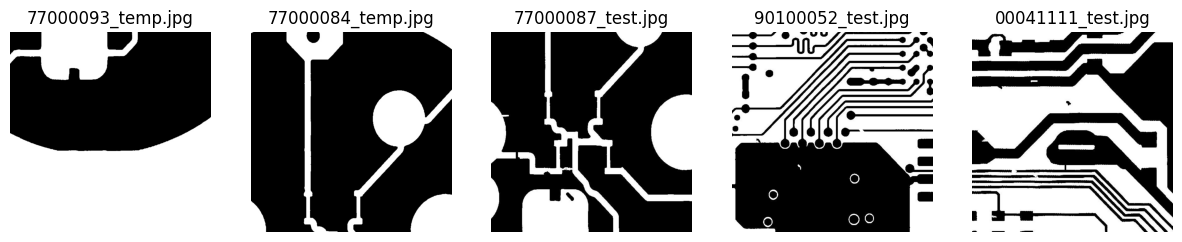

In [63]:
import os
import random
import matplotlib.pyplot as plt
import cv2

def visualize_random_images(folder_path, num_images=5):
    """Visualize random images from a specified folder."""
    # Get all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

    # Select random images
    random_images = random.sample(image_files, min(num_images, len(image_files)))

    # Plot images
    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(random_images):
        image_path = os.path.join(folder_path, image_name)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(image_name)
        plt.axis("off")

    plt.show()

# Example usage
folder_path = "DeepPCB_v2/PCBData/AllImages"  # Change this to your folder path
visualize_random_images(folder_path, num_images=5)


## Class Distribution

<ipython-input-64-f92c48ac2dfc>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Defect-Free", "Defective"], y=[defect_free, defective], palette=["green", "red"])


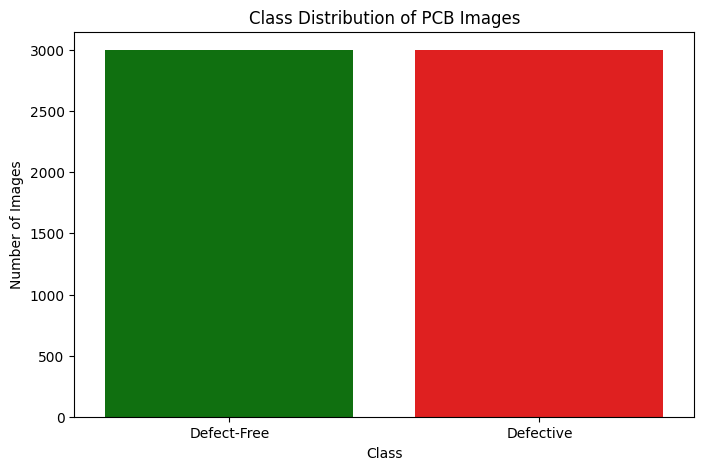

In [64]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(folder_path):
    """Visualize the class distribution of images based on filename indicators."""
    defect_free = 1500
    defective = 1500

    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('png', 'jpg', 'jpeg')):
            if "_temp" in filename:
                defect_free += 1
            elif "_test" in filename:
                defective += 1

    # Plotting
    plt.figure(figsize=(8, 5))
    sns.barplot(x=["Defect-Free", "Defective"], y=[defect_free, defective], palette=["green", "red"])
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title("Class Distribution of PCB Images")
    plt.show()


# Example usage
folder_path = "DeepPCB_v2/PCBData/AllImages"  # Change this to your actual image folder
plot_class_distribution(folder_path)


## Some Visualizations of bounding box annotations for object detection

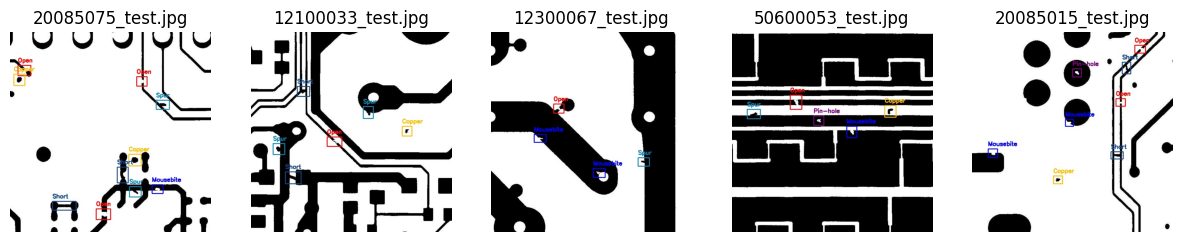

In [65]:
import os
import random
import matplotlib.pyplot as plt
import cv2

def visualize_random_images(folder_path, num_images=5):
    """Visualize random images from a specified folder."""
    # Get all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

    # Select random images
    random_images = random.sample(image_files, min(num_images, len(image_files)))

    # Plot images
    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(random_images):
        image_path = os.path.join(folder_path, image_name)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(image_name)
        plt.axis("off")

    plt.show()

# Example usage
folder_path = "DeepPCB_v2/PCBData/Annotated_Images"  # Change this to your folder path
visualize_random_images(folder_path, num_images=5)

<ipython-input-66-73b5ad357f2a>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Defect Type", y="Count", data=defect_df, palette="viridis", order=order)


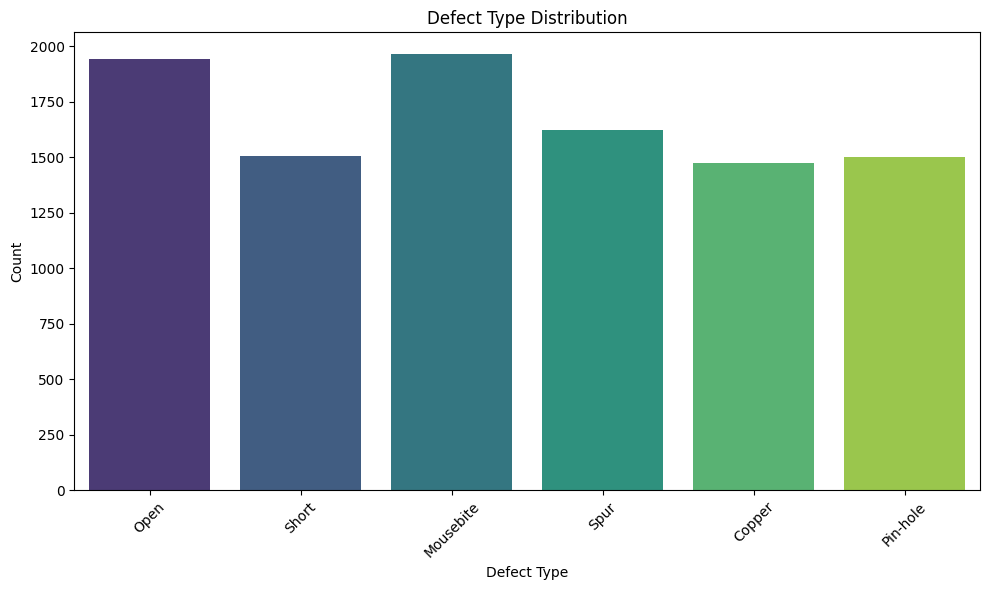

In [66]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def check_defect_type_distribution(folder_path):
    defect_counts = {}

    # Mapping of defect type numbers to names
    defect_names = {
        1: "Open",
        2: "Short",
        3: "Mousebite",
        4: "Spur",
        5: "Copper",
        6: "Pin-hole"
    }

    # Iterate through all annotation files in the folder
    for file in os.listdir(folder_path):
        if file.endswith(".txt"):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path, sep=" ", header=None, names=["x1", "y1", "x2", "y2", "defect_type"])

            for defect in df["defect_type"]:
                defect_counts[defect] = defect_counts.get(defect, 0) + 1

    # Create DataFrame
    defect_df = pd.DataFrame(list(defect_counts.items()), columns=["Defect Type", "Count"])

    # Map numeric defect types to names
    defect_df["Defect Type"] = defect_df["Defect Type"].map(defect_names)

    # Define custom order
    order = ["Open", "Short", "Mousebite", "Spur", "Copper", "Pin-hole"]

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Defect Type", y="Count", data=defect_df, palette="viridis", order=order)
    plt.xlabel("Defect Type")
    plt.ylabel("Count")
    plt.title("Defect Type Distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
check_defect_type_distribution("DeepPCB_v2/PCBData/AllAnnotations")


# Classification Task(Defective or Defect-free)

## Organize data in (defective/defect-free)folders for Classification training

In [67]:
import os
import shutil
import pandas as pd

# Load your CSV
df = pd.read_csv("DeepPCB_v2/PCBData/Classification_SplittedData/image_annotation_summary.csv")  # Make sure this CSV has columns: image_path, set (train/val/test), Label

def organize_existing_data(row):
    image_path = row['image_path']
    subset_name = row['set']         # Expected to be 'train', 'val', or 'test'
    label = 'defective' if row['label'] == 1 else 'defect_free'

    # Get current base folder (e.g., "train", "val", "test")
    current_folder = os.path.dirname(image_path)

    # Define destination folder path
    dest_folder = os.path.join(current_folder, label)
    os.makedirs(dest_folder, exist_ok=True)

    # Copy the image into the new subfolder
    dest_path = os.path.join(dest_folder, os.path.basename(image_path))
    shutil.move(image_path, dest_path)  # use `move` instead of `copy` to avoid duplicates

# Apply the function to each row in the DataFrame
df.apply(organize_existing_data, axis=1)

print("Images have been organized into defective and defect_free folders inside train/val/test.")


Images have been organized into defective and defect_free folders inside train/val/test.


## Check Number of Files

In [68]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/Classification_SplittedData/test/defect_free'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 225


In [69]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/Classification_SplittedData/test/defective'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 226


In [70]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/Classification_SplittedData/train/defect_free'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 1049


In [71]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/Classification_SplittedData/train/defective'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 1049


In [72]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/Classification_SplittedData/val/defective'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 225


In [73]:
import os

# Replace with your actual folder path on the VM
folder_path = 'DeepPCB_v2/PCBData/Classification_SplittedData/val/defect_free'  # or 'C:\\path\\to\\your\\folder' on Windows

# Count only files (excluding subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 225


## Data Preprocessing Using Augmentation

In [74]:
%pip install tensorflow

In [75]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

# Define paths
data_dir = r"DeepPCB_v2/PCBData/Classification_SplittedData"

# Image size and batch size
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Random rotations up to 30 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Random zooming
    horizontal_flip=True,  # Random horizontal flipping
    vertical_flip=True,  # Random vertical flipping
    brightness_range=[0.8, 1.2]  # Random brightness adjustments
)

# Load datasets
train_generator = datagen.flow_from_directory(
    directory=os.path.join(data_dir, 'train'),
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    directory=os.path.join(data_dir, 'val'),
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory=os.path.join(data_dir, 'test'),
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # Keep order for evaluation
)

print("Data successfully loaded with augmentation!")



Found 2098 images belonging to 2 classes.
Found 450 images belonging to 2 classes.
Found 451 images belonging to 2 classes.
Data successfully loaded with augmentation!


## Classification Model Building and Training

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define image dimensions
IMG_HEIGHT = 224
IMG_WIDTH = 224

# CNN Model
model = Sequential([
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # This replaces input_shape in Conv2D
    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [77]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    filepath='DeepPCB_v2/PCBData/Classification_SplittedData/best_model.keras',          # Path to save the best model
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train the model with callbacks
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stop, checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4782 - loss: 0.6965
Epoch 1: val_loss improved from inf to 0.69316, saving model to DeepPCB_v2/PCBData/Classification_SplittedData/best_model.keras
66/66 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.4784 - loss: 0.6964 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5075 - loss: 0.6931
Epoch 2: val_loss improved from 0.69316 to 0.69316, saving model to DeepPCB_v2/PCBData/Classification_SplittedData/best_model.keras
66/66 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.5074 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5194 - loss: 0.6931
Epoch 3: val_loss did not improve from 0.69316
66/66 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.5192 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4773 - loss: 0.6933
Epoch 4: val_

In [78]:
# Save the model
model.save("pcb_defect_classifier.keras")

print("Model training complete and saved as 'pcb_defect_classifier.keras'")

Model training complete and saved as 'pcb_defect_classifier.keras'


## Model Evaluation

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model("pcb_defect_classifier.keras")


# Prepare test data
# Prepare test data (only rescaling, no augmentations)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # Keep order for consistent evaluation
)



Found 451 images belonging to 2 classes.


In [80]:

# Evaluate model performance
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 494ms/step - accuracy: 0.7893 - loss: 0.6931
Test Accuracy: 0.4989


In [81]:

# Predict on test data
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class labels

# Get true labels
y_true = test_generator.classes

15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 479ms/step



Classification Report:
              precision    recall  f1-score   support

 Defect-Free       0.50      1.00      0.67       225
   Defective       0.00      0.00      0.00       226

    accuracy                           0.50       451
   macro avg       0.25      0.50      0.33       451
weighted avg       0.25      0.50      0.33       451



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


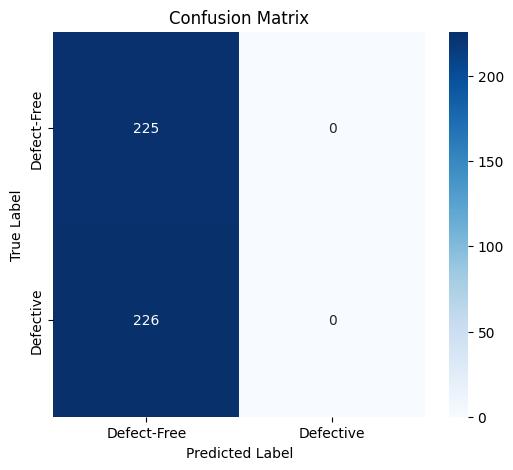

In [82]:

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Defect-Free', 'Defective']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Defect-Free', 'Defective'], yticklabels=['Defect-Free', 'Defective'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Transfer Learning

In [83]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image size must match pretrained model input
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32
NUM_CLASSES = 1  # Binary classification

# Load base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model.trainable = False  # Freeze base model for feature extraction


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [84]:
# Add new classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=predictions)


In [85]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Random rotations up to 30 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Random zooming
    horizontal_flip=True,  # Random horizontal flipping
    vertical_flip=True,  # Random vertical flipping
    brightness_range=[0.8, 1.2]  # Random brightness adjustments
)
train_gen = datagen.flow_from_directory(
    'DeepPCB_v2/PCBData/Classification_SplittedData/train',  # structured as /class_name/image.jpg
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_gen = datagen.flow_from_directory(
    'DeepPCB_v2/PCBData/Classification_SplittedData/val',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Initial training (feature extraction)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)
model.save("pcb_defect_classifier_Transfer.keras")


Found 2098 images belonging to 2 classes.
Found 450 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5465 - loss: 0.8165 - val_accuracy: 0.6356 - val_loss: 0.6335
Epoch 2/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.6119 - loss: 0.6822 - val_accuracy: 0.6578 - val_loss: 0.6121
Epoch 3/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.6273 - loss: 0.6590 - val_accuracy: 0.7311 - val_loss: 0.5687
Epoch 4/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.6416 - loss: 0.6363 - val_accuracy: 0.6933 - val_loss: 0.5852
Epoch 5/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.6886 - loss: 0.5849 - val_accuracy: 0.7422 - val_loss: 0.5513


## Fine-Tuning

In [86]:
# Unfreeze top layers of the base model
#from tensorflow.keras.models import load_model

#Load the model trained in the feature extraction phase
#model = load_model("pcb_defect_classifier_Transfer.keras")
#base_model = model.layers[0]
base_model.trainable = True

# Optional: fine-tune only the top N layers
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune
fine_tune_history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)
model.save("pcb_defect_classifier_tuned.keras")

Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.5834 - loss: 0.6896 - val_accuracy: 0.6356 - val_loss: 0.6273
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.6454 - loss: 0.6378 - val_accuracy: 0.5689 - val_loss: 0.7219
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.6728 - loss: 0.5877 - val_accuracy: 0.5556 - val_loss: 0.7854
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 186s 3s/step - accuracy: 0.6793 - loss: 0.5892 - val_accuracy: 0.5289 - val_loss: 0.9243
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 189s 3s/step - accuracy: 0.7228 - loss: 0.5513 - val_accuracy: 0.5333 - val_loss: 1.0225
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 183s 3s/step - accuracy: 0.7333 - loss: 0.5257 - val_accuracy: 0.5311 - val_loss: 1.1503
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 183s 3s/step - accuracy: 0.7355 - loss: 0.5098 - val_accuracy: 0.5156 - val_loss: 1.2972
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 184s 3s/step - accuracy: 0.7726 - loss: 0.4803 - val_accuracy: 0.5222 - v

## Evaluation

Found 451 images belonging to 2 classes.
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8293 - loss: 0.5015
✅ Test Accuracy: 0.60
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step


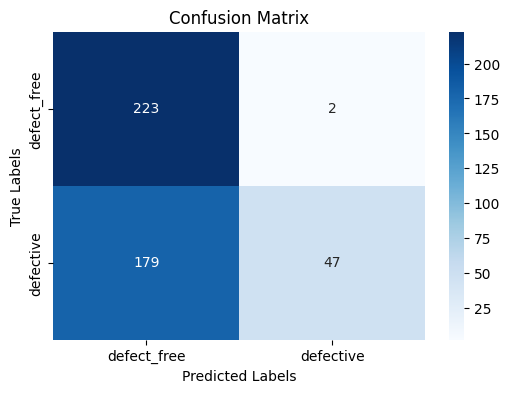


Classification Report:
              precision    recall  f1-score   support

 defect_free       0.55      0.99      0.71       225
   defective       0.96      0.21      0.34       226

    accuracy                           0.60       451
   macro avg       0.76      0.60      0.53       451
weighted avg       0.76      0.60      0.53       451



In [87]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    'DeepPCB_v2/PCBData/Classification_SplittedData/test',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

loss, acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {acc:.2f}")


y_true = test_gen.classes
y_pred_probs = model.predict(test_gen)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
class_names = list(test_gen.class_indices.keys())

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))



In [89]:
import tensorflow as tf
import numpy as np
import cv2
import os

# Load trained model
model = tf.keras.models.load_model("pcb_defect_classifier.keras")

# Define image path
image_path = "/content/defective_test_image.png"  # Update with your image path

# Define image dimensions (should match training size)
IMG_HEIGHT = 224
IMG_WIDTH = 224

# Load and preprocess image
def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert grayscale to RGB
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))  # Resize to match model input size
    img = img / 255.0  # Normalize pixel values to [0,1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Preprocess the image
input_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(input_image)[0][0]  # Get probability

# Interpret the result
threshold = 0.5  # Set threshold for classification
if prediction >= threshold:
    print(f"Prediction: Defective PCB (Confidence: {prediction:.4f})")
else:
    print(f"Prediction: Defect-Free PCB (Confidence: {1 - prediction:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
Prediction: Defect-Free PCB (Confidence: 0.5001)


# Object Detection Task

## Remove Test string from images names

In [90]:
import os
Images_path = '/content/DeepPCB_v2/PCBData/AllTest'
files = os.listdir(Images_path)
for file in files:
    old_name = os.path.join(Images_path, file)
    new_name = old_name.replace('_test','')
    os.rename(old_name, new_name)

In [91]:
import os
import cv2
labels_path = '/content/DeepPCB_v2/PCBData/AllAnnotations'
files = os.listdir(labels_path)
for filename in files:
    file_path = os.path.join(labels_path, filename)
    image_path = os.path.join(Images_path, filename.replace('.txt', '.jpg'))

    with open(file_path, 'r') as f:
      lines = f.readlines()

    img = cv2.imread(image_path)
    h, w = img.shape[:2]

    newlines=[]
    for line in lines:

      info=line.strip().split(' ')
      x_min, y_min, x_max, y_max, class_id = map(float, info)

      x_center = ((x_min + x_max) / 2) / w
      y_center = ((y_min + y_max) / 2) / h
      width    = (x_max - x_min) / w
      height   = (y_max - y_min) / h

      lst=[str(class_id-1),str(x_center),str(y_center),str(width),str(height)]
      new_line=' '.join(lst)+'\n'
      newlines.append(new_line)

    with open(file_path, 'w') as f:
      f.writelines(newlines)

In [92]:
import os
import random

# Paths
Images_path = '/content/DeepPCB_v2/PCBData/AllTest' # path to images
Labels_path = '/content/DeepPCB_v2/PCBData/AllAnnotations'      # path to labels
Images_lst=[]
Labels_lst=[]

for images in os.listdir(Images_path):
  Images_lst.append(images.replace(Images_path,''))


# Split ratio
train_ratio = 0.8  # 80% train, 20% val

# Paths

output_dir = "/content/DeepPCB_v2/PCBData/Object_detection"      # output base dir
os.makedirs(output_dir, exist_ok=True)


# --- CREATE OUTPUT FOLDERS ---
train_image_dir = os.path.join(output_dir, "train/images/")
train_label_dir = os.path.join(output_dir, "train/labels/")
val_image_dir = os.path.join(output_dir, "val/images/")
val_label_dir = os.path.join(output_dir, "val/labels/")

os.makedirs(train_image_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_image_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

## --- SPLIT DATA INTO TRAIN AND VALIDATION ---

random.shuffle(Images_lst)
num_train = int(len(Images_lst) * train_ratio)
train_images = Images_lst[:num_train]
val_images = Images_lst[num_train:]

train_label=[i.replace('.jpg','.txt') for i in train_images]
val_label=[i.replace('.jpg','.txt') for i in val_images]




## Move data into two Folders Train and validation to be ready for object detection

In [93]:
import shutil

 # Copy image
for image,label in zip(train_images,train_label):
    shutil.copy2(os.path.join(Images_path, image), os.path.join(train_image_dir, image))
    shutil.copy2(os.path.join(Labels_path, label), os.path.join(train_label_dir, label))

for image,label in zip(val_images,val_label):
    shutil.copy2(os.path.join(Images_path, image), os.path.join(val_image_dir, image))
    shutil.copy2(os.path.join(Labels_path, label), os.path.join(val_label_dir, label))


## Install YOLO MODEL and test if's working fine

In [94]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [95]:
from ultralytics import YOLO
YOLO('yolov8n.pt')  # just loads the model to make sure it works

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 18.0MB/s]


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

## Data Yaml --> for configuration

In [96]:
train_path = os.path.abspath('train/images')
val_path = os.path.abspath('val/images')

with open('data.yaml', 'w') as f:
    f.write(f"""
train: {train_path}
val: {val_path}
nc: 6
names: ['open', 'short', 'mousebite', 'spur', 'copper', 'pin-hole']
""")


In [97]:
data_yaml = """
path: /content/DeepPCB_v2/PCBData/Object_detection # base folder containing train/ and val/
train: train/images  # Path to train images
val: val/images      # Path to validation images

nc: 6  # Number of classes
names: ['open', 'short', 'mousebite', 'spur', 'copper', 'pin-hole']  # List of class names
"""

with open('data.yaml', 'w') as f:
    f.write(data_yaml)

## Object Detection Model

In [98]:
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=10 imgsz=640

Ultralytics 8.3.112 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchsc

## Model Validation

In [100]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')
model.val(data="/content/data.yaml")

Ultralytics 8.3.112 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1019.9±398.5 MB/s, size: 33.7 KB)


val: Scanning /content/DeepPCB_v2/PCBData/Object_detection/val/labels.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [01:29<00:00,  4.73s/it]


                   all        300       1932      0.956      0.921      0.971      0.717
                  open        270        386       0.94      0.969      0.986      0.668
                 short        213        290      0.945      0.838      0.922      0.618
             mousebite        252        364      0.956      0.942      0.978      0.685
                  spur        231        308      0.965      0.908      0.975      0.686
                copper        237        288      0.966      0.938      0.982      0.842
              pin-hole        263        296      0.966      0.929      0.983      0.803
Speed: 5.6ms preprocess, 283.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f106c584f50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

## Display Results

In [102]:
import cv2

image_path = '/content/DeepPCB_v2/PCBData/group00041/00041/00041000_test.jpg'

results = model(image_path)

# Save the rendered result (automatically includes bounding boxes, labels, etc.)
rendered = results[0].plot()
cv2.imwrite('result.jpg', rendered)



image 1/1 /content/DeepPCB_v2/PCBData/group00041/00041/00041000_test.jpg: 640x640 1 open, 1 short, 1 mousebite, 1 spur, 2 coppers, 3 pin-holes, 209.7ms
Speed: 3.6ms preprocess, 209.7ms inference, 8.2ms postprocess per image at shape (1, 3, 640, 640)


True

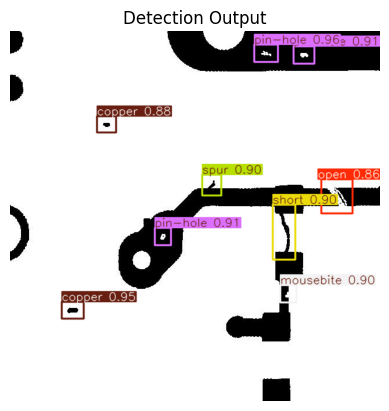

In [103]:
import cv2
from matplotlib import pyplot as plt

# Get the plotted image from the result
plotted_img = results[0].plot()  # This returns a numpy array

# Display the image using matplotlib
plt.imshow(plotted_img)
plt.axis('off')
plt.title('Detection Output')
plt.show()



In [105]:
from PIL import Image

# Convert the NumPy array to a PIL image and save
Image.fromarray(plotted_img).save('detection_output.png')


In [106]:
boxes = results[0].boxes
for box in boxes:
    print("Class:", box.cls.item())
    print("Confidence:", box.conf.item())
    print("Coordinates:", box.xyxy.tolist())  # or .xywh

Class: 5.0
Confidence: 0.9627326130867004
Coordinates: [[422.8848876953125, 23.105396270751953, 463.0064697265625, 53.6773567199707]]
Class: 4.0
Confidence: 0.9498199820518494
Coordinates: [[89.49787902832031, 468.43829345703125, 127.62953186035156, 497.27508544921875]]
Class: 5.0
Confidence: 0.9146084785461426
Coordinates: [[250.62249755859375, 340.503662109375, 278.871337890625, 370.5396728515625]]
Class: 5.0
Confidence: 0.9104855060577393
Coordinates: [[490.64178466796875, 26.9613037109375, 526.7860717773438, 56.365089416503906]]
Class: 2.0
Confidence: 0.9025680422782898
Coordinates: [[467.0992736816406, 439.5567932128906, 495.8910827636719, 469.5899963378906]]
Class: 3.0
Confidence: 0.9002716541290283
Coordinates: [[332.18621826171875, 248.35400390625, 365.07586669921875, 284.453125]]
Class: 1.0
Confidence: 0.8993866443634033
Coordinates: [[454.1533508300781, 300.48162841796875, 493.7757263183594, 395.98846435546875]]
Class: 4.0
Confidence: 0.8778724670410156
Coordinates: [[150.265

In [107]:
import os
import cv2
import numpy as np

# Example: dataset_path/group00041/00041/*.jpg
image_folder = '/content/DeepPCB_v2/PCBData/AllTest'
image_list = []


        # Collect all images in this folder
images = []
for file_name in sorted(os.listdir(image_folder)):
        if file_name.endswith(('.jpg', '.png')):
            image_path = os.path.join(image_folder, file_name)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # grayscale
            images.append(img)

        image_list.append(images)  # add list of images for this group


In [108]:

from ultralytics import YOLO

# Load your trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # replace with your model path


In [110]:
import cv2
import numpy as np

# Convert grayscale to 3-channel if needed
img = image_list[40][3]
if len(img.shape) == 2:  # if grayscale
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)



0: 640x640 1 open, 2 mousebites, 1 copper, 2 pin-holes, 319.5ms
Speed: 5.8ms preprocess, 319.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


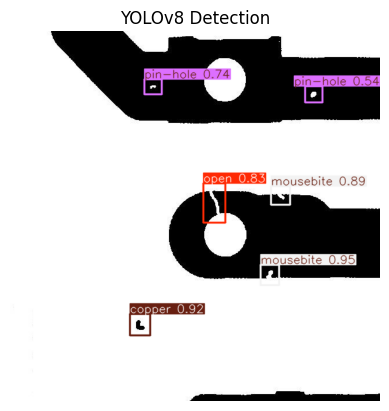

In [111]:
# Inference
results = model(img)
import matplotlib.pyplot as plt

# You can use YOLO's plotting method
results[0].plot()  # for rendering
plt.imshow(results[0].plot())
plt.axis('off')
plt.title('YOLOv8 Detection')
plt.show()


## Fine Tuning on object detection

### Data Augmentation Settings

In [112]:
hyp_yaml = """

## Basic parameters
lr0: 0.002
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 3.0

# Data augmentation settings
hsv_h: 0.01      # Hue variation
hsv_s: 0.4        # Saturation variation
hsv_v: 0.3        # Value (brightness) variation
degrees: 3.0      # Rotation
translate: 0.02    # Image translation (shifting)
scale: 0.1        # Image zoom in/out
shear: 0.0        # Shear angle
perspective: 0.0001  # Perspective distortion
flipud: 0.0       # Vertical flip probability
fliplr: 0.2       # Horizontal flip probability
mosaic: 0.5       # Mosaic augmentation probability
mixup: 0.0        # Mixup augmentation probability

##Model parameter for defining center
iou_t: 0.2
anchor_t: 4.0
cls: 0.4
obj: 1.0
"""
with open('hyp.yaml', 'w') as f:
    f.write(hyp_yaml)

In [113]:
#YOLO('/content/runs/detect/train2/weights/best.pt')

In [ ]:


from ultralytics import YOLO

model = model = YOLO('/content/runs/detect/train/weights/best.pt')
model.tune(
    data="data.yaml",
    epochs=3,
    imgsz=640,
    iterations=10,
    val=True,   # <-- add this!
   space={
         "lr0": (1e-4, 0.005),
    "momentum": (0.85, 0.95),
    "weight_decay": (0.0001, 0.0005),
    "box": (0.02, 0.2),     # Reduce!
    "cls": (0.2, 0.5),
    "dfl": (0.5, 1.5),
    "translate": (0.0, 0.1),
    "scale": (0.1, 0.3),
    "fliplr": (0.0, 0.3),
    "mosaic": (0.5, 0.8)
    }

)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/10 with hyperparameters: {'lr0': 0.005, 'momentum': 0.937, 'weight_decay': 0.0005, 'box': 0.2, 'cls': 0.5, 'dfl': 1.5, 'translate': 0.1, 'scale': 0.3, 'fliplr': 0.3, 'mosaic': 0.8}
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 1/10 iterations complete ✅ (3239.46s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.70262 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.94901, 'metrics/recall(B)': 0.91867, 'metrics/mAP50(B)': 0.96937, 'metrics/mAP50-95(B)': 0.67298, 'val/box_loss': 0.02827, 'val/cls_loss': 0.70726, 'val/dfl_loss': 0.94839, 'fitness': 0.70262}
Tuner: Best fitness model is runs/detect/train2
Tuner: Best fitness hyperparameters are printed below.

Printing 'runs/detect/tune/best_hyperparameters.yaml'


In [ ]:
ls -lt


In [ ]:
import cv2
import numpy as np

# Convert grayscale to 3-channel if needed
img = image_list[45][3]
if len(img.shape) == 2:  # if grayscale
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    # Inference
results = model(img)
import matplotlib.pyplot as plt

# You can use YOLO's plotting method
results[0].plot()  # for rendering
plt.imshow(results[0].plot())
plt.axis('off')
plt.title('YOLOv8 Detection')
plt.show()

###